In [63]:
import pandas as pd
from glob import glob
from datetime import timedelta
import numpy as np

In [64]:
all_files_oi = glob('data/fao_participant_oi_*.csv')

li = []

for filename in all_files_oi:
    df = pd.read_csv(filename, skiprows=1,nrows=4)
    f = filename[24:32]
    df['Date'] = pd.to_datetime(f,  format='%d%m%Y')
    li.append(df)
    

df = pd.concat(li, axis=0, ignore_index=True)
max_date=df['Date'].max()
df2=df.copy()
df2.sort_values(by=['Date','Client Type'],inplace=True)
df2.set_index(['Date','Client Type'],inplace=True,drop=False)
df.set_index(['Date','Client Type'],inplace=True,drop=True)
df.sort_values(by=['Date','Client Type'],inplace=True)


In [65]:
df2['Call Long + Put Short Index'] = df2['Option Index Call Long'] + df2['Option Index Put Short']
df2['Put Long + Call Short Index'] = df2['Option Index Put Long'] + df2['Option Index Call Short']
df2['Call Long + Put Short Stock'] = df2['Option Stock Call Long'] + df2['Option Stock Put Short']
df2['Put Long + Call Short Stock'] = df2['Option Stock Put Long'] + df2['Option Stock Call Short']
df2['Future Index Net'] = df2['Future Index Long'] - df2['Future Index Short']
df2['Future Stock Net'] = df2['Future Stock Long'] - df2['Future Stock Short\t']
df2['Option Index Net'] = df2['Call Long + Put Short Index'] - df2['Put Long + Call Short Index']
df2['Option Stock Net'] = df2['Call Long + Put Short Stock'] - df2['Put Long + Call Short Stock']
df2['Future Index Market View'] = df2['Future Index Long'] > df2['Future Index Short']
df2['Future Stock Market View'] = df2['Future Stock Long'] > df2['Future Stock Short\t']
df2['Option Index Market View'] = df2['Call Long + Put Short Index'] > df2['Put Long + Call Short Index']
df2['Option Stock Market View'] = df2['Call Long + Put Short Stock'] > df2['Put Long + Call Short Stock']

df2['FUTIDX Active Party1'] = df2['Future Index Long'] + df2['Future Index Short']
df2['FUTSTK Active Party1'] = df2['Future Stock Long'] + df2['Future Stock Short\t']
df2['OPTIDX Active Party1'] = df2['Option Index Call Long'] + df2['Option Index Put Long'] + df2['Option Index Call Short'] + df2['Option Index Put Short'] 
df2['OPTSTK Active Party1'] = df2['Option Stock Call Long'] + df2['Option Stock Put Long'] + df2['Option Stock Call Short'] + df2['Option Stock Put Short'] 
df2['FUTIDX Active Party2'] = df2.groupby(level=0)['FUTIDX Active Party1'].transform(np.max)
df2['FUTSTK Active Party2'] = df2.groupby(level=0)['FUTSTK Active Party1'].transform(np.max)
df2['OPTIDX Active Party2'] = df2.groupby(level=0)['OPTIDX Active Party1'].transform(np.max)
df2['OPTSTK Active Party2'] = df2.groupby(level=0)['OPTSTK Active Party1'].transform(np.max)
df2.replace(True,'Bullish',inplace=True)
df2.replace(False,'Bearish',inplace=True)
df2['FUTIDX Active Party']=df2[df2['FUTIDX Active Party1'] == df2['FUTIDX Active Party2']]['Client Type']
df2['FUTSTK Active Party']=df2[df2['FUTSTK Active Party1'] == df2['FUTSTK Active Party2']]['Client Type']
df2['OPTIDX Active Party']=df2[df2['OPTIDX Active Party1'] == df2['OPTIDX Active Party2']]['Client Type']
df2['OPTSTK Active Party']=df2[df2['OPTSTK Active Party1'] == df2['OPTSTK Active Party2']]['Client Type']
df2.drop(columns=['FUTIDX Active Party1','FUTIDX Active Party2','FUTSTK Active Party1','FUTSTK Active Party2','OPTIDX Active Party1','OPTIDX Active Party2','OPTSTK Active Party1','OPTSTK Active Party2'],inplace=True)
df2.set_index(['Date','Client Type'],inplace=True,drop=True)
df2.sort_values(by=['Date','Client Type'],inplace=True)
df2.to_excel('main.xlsx',merge_cells=False)
df2

Future Index Long  Future Index Short  \
Date       Client Type                                          
2020-01-01 Client                  115250              125282   
           DII                      42823               33078   
           FII                      65820               50978   
           Pro                      17200               31755   
2020-01-02 Client                  123136              128358   
...                                   ...                 ...   
2020-07-28 Pro                      41610               24711   
2020-07-29 Client                   97607              119495   
           DII                      10480               36618   
           FII                      95107               83542   
           Pro                      58204               21743   

                        Future Stock Long  Future Stock Short\t  \
Date       Client Type                                            
2020-01-01 Client                  733122                202664   
           DII                      16306               1097093   
           FII                     959994                463652   
           Pro                     134303                 80316   
2020-01-02 Client                  735606                210830   
...                                   ...                   ...   
2020-07-28 Pro                     171923                129574   
2020-07-29 Client                  478952                156399   
           DII                      33135                796074   
           FII                     846107                441228   
           Pro                     151629                116122   

                        Option Index Call Long  Option Index Put Long  \
Date       Client Type                                                  
2020-01-01 Client                       730997                 564667   
           DII                            4317                  65841   
           FII                          162126                 226473   
           Pro                          146371                 179624   
2020-01-02 Client                       320823                 443499   
...                                        ...                    ...   
2020-07-28 Pro                          189230                 261914   
2020-07-29 Client                       899920                 857574   
           DII                             267                  57192   
           FII                          209683                 283050   
           Pro                          217589                 283815   

                        Option Index Call Short  Option Index Put Short  \
Date       Client Type                                                    
2020-01-01 Client                        697604                  736946   
           DII                                0                       0   
           FII                            59442                   79978   
           Pro                           286765                  219681   
2020-01-02 Client                        438439                  620983   
...                                         ...                     ...   
2020-07-28 Pro                           286549                  325008   
2020-07-29 Client                        770312                  976818   
           DII                                0                       0   
           FII                           165962                  187746   
           Pro                           391185                  317067   

                        Option Stock Call Long  Option Stock Put Long  ...  \
Date       Client Type                                                 ...   
2020-01-01 Client                       165422                  71679  ...   
           DII                               0                      0  ...   
           FII                            8550                  1130

In [66]:
difference = df.diff(periods=4)
difference['Call Long + Put Short Index'] = difference['Option Index Call Long'] + difference['Option Index Put Short']
difference['Put Long + Call Short Index'] = difference['Option Index Put Long'] + difference['Option Index Call Short']
difference['Call Long + Put Short Stock'] = difference['Option Stock Call Long'] + difference['Option Stock Put Short']
difference['Put Long + Call Short Stock'] = difference['Option Stock Put Long'] + difference['Option Stock Call Short']
difference['Future Index Net'] = difference['Future Index Long'] - difference['Future Index Short']
difference['Future Stock Net'] = difference['Future Stock Long'] - difference['Future Stock Short\t']
difference['Option Index Net'] = difference['Call Long + Put Short Index'] - difference['Put Long + Call Short Index']
difference['Option Stock Net'] = difference['Call Long + Put Short Stock'] - difference['Put Long + Call Short Stock']
difference['Future Index Market View'] = difference['Future Index Long'] > difference['Future Index Short']
difference['Future Stock Market View'] = difference['Future Stock Long'] > difference['Future Stock Short\t']
difference['Option Index Market View'] = difference['Call Long + Put Short Index'] > difference['Put Long + Call Short Index']
difference['Option Stock Market View'] = difference['Call Long + Put Short Stock'] > difference['Put Long + Call Short Stock']
difference.replace(True,'Bullish',inplace=True)
difference.replace(False,'Bearish',inplace=True)
#difference.to_excel('difference.xlsx')
#difference

In [67]:
all_files_vol = glob('data/fao_participant_vol*.csv')

li = []

for filename in all_files_vol:
    df = pd.read_csv(filename, skiprows=1,nrows=4)
    f = filename[25:33]
    df['Date'] = pd.to_datetime(f,  format='%d%m%Y')
    li.append(df)
    

dfv = pd.concat(li, axis=0, ignore_index=True)

In [68]:
dfv2=dfv.copy()
dfv2.drop(columns=['Total Long Contracts\t','Total Short Contracts'],inplace=True)
dfv2.set_index(['Date','Client Type'],inplace=True,drop=True)
dfv2.sort_values(by=['Date','Client Type'],inplace=True)
dfv2.rename(columns={"Future Index Long" : "Vol Future Index Long","Future Index Short" : "Vol Future Index Short","Future Stock Long" : "Vol Future Stock Long","Future Stock Short\t" : "Vol Future Stock Short","Option Index Call Long" : "Vol Option Index Call Long","Option Index Put Long" : "Vol Option Index Put Long","Option Index Call Short" : "Vol Option Index Call Short","Option Index Put Short" : "Vol Option Index Put Short","Option Stock Call Long" : "Vol Option Stock Call Long","Option Stock Put Long" : "Vol Option Stock Put Long","Option Stock Call Short" : "Vol Option Stock Call Short","Option Stock Put Short" : "Vol Option Stock Put Short"},inplace=True)
difference = pd.merge(difference, dfv2,how='left', on=['Date', 'Client Type'])
difference['VR FUTIDX Long'] = difference['Future Index Long'] / difference['Vol Future Index Long']
difference['VR FUTINDX Short'] = difference['Future Index Short'] / difference['Vol Future Index Short']
difference['VR FUTSTK Long'] = difference['Future Stock Long'] / difference['Vol Future Stock Long']
difference['VR FUTSTK Short'] = difference['Future Stock Short\t'] / difference['Vol Future Stock Short']
difference['VR OPTIDX CE Long'] = difference['Option Index Call Long'] / difference['Vol Option Index Call Long']
difference['VR OPTIDX PE Long'] = difference['Option Index Put Long'] / difference['Vol Option Index Put Long']
difference['VR OPTIDX CE Short'] = difference['Option Index Call Short'] / difference['Vol Option Index Call Short']
difference['VR OPTIDX PE Short'] = difference['Option Index Put Short'] / difference['Vol Option Index Put Short']
difference['VR OPTSTK CE Long'] = difference['Option Stock Call Long'] / difference['Vol Option Stock Call Long']
difference['VR OPTSTK PE Long'] = difference['Option Stock Put Long'] / difference['Vol Option Stock Put Long']
difference['VR OPTSTK CE Short'] = difference['Option Stock Call Short'] / difference['Vol Option Stock Call Short'] 
difference['VR OPTSTK PE Short'] = difference['Option Stock Put Short'] / difference['Vol Option Stock Put Short']
difference.to_excel('difference.xlsx',merge_cells=False)
difference

Future Index Long  Future Index Short  \
Date       Client Type                                          
2020-01-01 Client                     NaN                 NaN   
           DII                        NaN                 NaN   
           FII                        NaN                 NaN   
           Pro                        NaN                 NaN   
2020-01-02 Client                  7886.0              3076.0   
...                                   ...                 ...   
2020-07-28 Pro                     4008.0             -3585.0   
2020-07-29 Client                -12604.0             -3073.0   
           DII                        0.0               224.0   
           FII                    12022.0             21829.0   
           Pro                    16594.0             -2968.0   

                        Future Stock Long  Future Stock Short\t  \
Date       Client Type                                            
2020-01-01 Client                     NaN                   NaN   
           DII                        NaN                   NaN   
           FII                        NaN                   NaN   
           Pro                        NaN                   NaN   
2020-01-02 Client                  2484.0                8166.0   
...                                   ...                   ...   
2020-07-28 Pro                    -7979.0               13010.0   
2020-07-29 Client                -19579.0              -32170.0   
           DII                       13.0                2038.0   
           FII                   -12246.0               -8522.0   
           Pro                   -20294.0              -13452.0   

                        Option Index Call Long  Option Index Put Long  \
Date       Client Type                                                  
2020-01-01 Client                          NaN                    NaN   
           DII                             NaN                    NaN   
           FII                             NaN                    NaN   
           Pro                             NaN                    NaN   
2020-01-02 Client                    -410174.0              -121168.0   
...                                        ...                    ...   
2020-07-28 Pro                         -9657.0                10427.0   
2020-07-29 Client                     213891.0               -34263.0   
           DII                             0.0                 3510.0   
           FII                          6682.0                 8891.0   
           Pro                         28359.0                21901.0   

                        Option Index Call Short  Option Index Put Short  \
Date       Client Type                                                    
2020-01-01 Client                           NaN                     NaN   
           DII                              NaN                     NaN   
           FII                              NaN                     NaN   
           Pro                              NaN                     NaN   
2020-01-02 Client                     -259165.0               -115963.0   
...                                         ...                     ...   
2020-07-28 Pro                         -42069.0                 40131.0   
2020-07-29 Client                      125831.0                 19496.0   
           DII                              0.0                     0.0   
           FII                          18465.0                -11516.0   
           Pro                         104636.0                 -7941.0   

                        Option Stock Call Long  Option Stock Put Long  ...  \
Date       Client Type                                                 ...   
2020-01-01 Client                          NaN                    NaN  ...   
           DII                             NaN                    NaN  ...   
           FII                             NaN                    Na

In [69]:
df2[df2.index.get_level_values('Date') == max_date]

Future Index Long  Future Index Short  \
Date       Client Type                                          
2020-07-29 Client                   97607              119495   
           DII                      10480               36618   
           FII                      95107               83542   
           Pro                      58204               21743   

                        Future Stock Long  Future Stock Short\t  \
Date       Client Type                                            
2020-07-29 Client                  478952                156399   
           DII                      33135                796074   
           FII                     846107                441228   
           Pro                     151629                116122   

                        Option Index Call Long  Option Index Put Long  \
Date       Client Type                                                  
2020-07-29 Client                       899920                 857574   
           DII                             267                  57192   
           FII                          209683                 283050   
           Pro                          217589                 283815   

                        Option Index Call Short  Option Index Put Short  \
Date       Client Type                                                    
2020-07-29 Client                        770312                  976818   
           DII                                0                       0   
           FII                           165962                  187746   
           Pro                           391185                  317067   

                        Option Stock Call Long  Option Stock Put Long  ...  \
Date       Client Type                                                 ...   
2020-07-29 Client                       361596                 175473  ...   
           DII                              33                      0  ...   
           FII                           12885                  15573  ...   
           Pro                          128090                 129217  ...   

                        Option Index Net  Option Stock Net  \
Date       Client Type                                       
2020-07-29 Client                 248852            121335   
           DII                    -56925             -7597   
           FII                    -51583            -15733   
           Pro                   -140344            -98005   

                        Future Index Market View  Future Stock Market View  \
Date       Client Type                                                       
2020-07-29 Client                        Bearish                   Bullish   
           DII                           Bearish                   Bearish   
           FII                           Bullish                   Bullish   
           Pro                           Bullish                   Bullish   

                        Option Index Market View  Option Stock Market View  \
Date       Client Type                                                       
2020-07-29 Client                        Bullish                   Bullish   
           DII                           Bearish                   Bearish   
           FII                           Bearish                   Bearish   
           Pro                           Bearish                   Bearish   

                        FUTIDX Active Party  FUTSTK Active Party  \
Date       Client Type                                             
2020-07-29 Client                    Client                  NaN   
           DII                          NaN                  NaN   
           FII                          NaN                  FII   
           Pro                          NaN                  NaN   

                        OPTIDX Active Party  OPTSTK Active Party  
Date       Client Type                                            
2020-07-29 Client

In [70]:
df2[df2.index.get_level_values('Date') == max_date].sum().to_frame().T

,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short\t,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,Option Stock Put Long,...,Call Long + Put Short Stock,Put Long + Call Short Stock,Future Index Net,Future Stock Net,Option Index Net,Option Stock Net,Future Index Market View,Future Stock Market View,Option Index Market View,Option Stock Market View
0,261398,261398,1509823,1509823,1327459,1481631,1327459,1481631,502604,320263,...,822867,822867,0,0,0,0,BearishBearishBullishBullish,BullishBearishBullishBullish,BullishBearishBearishBearish,BullishBearishBearishBearish


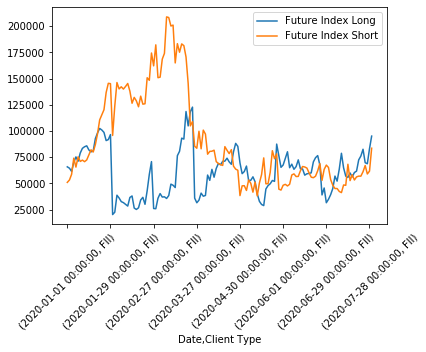

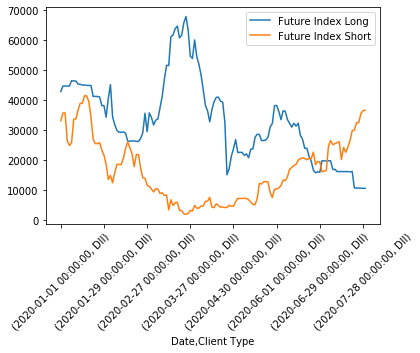

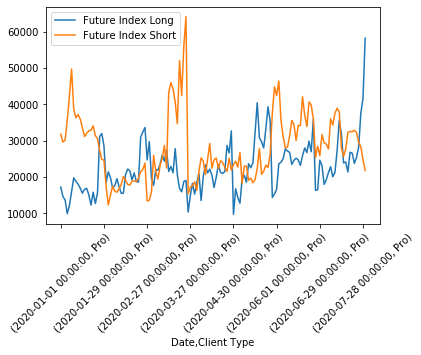

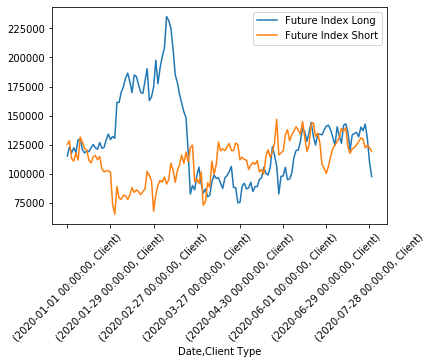

In [71]:
#df2[df2.index.get_level_values('Client Type') == 'FII'].plot(x='Future Index Long',y='Future Index Short',kind='line')
df3=df2[df2.index.get_level_values('Client Type') == 'FII']
df3[['Future Index Long','Future Index Short']].plot(rot=45)

df3=df2[df2.index.get_level_values('Client Type') == 'DII']
df3[['Future Index Long','Future Index Short']].plot(rot=45)

df3=df2[df2.index.get_level_values('Client Type') == 'Pro']
df3[['Future Index Long','Future Index Short']].plot(rot=45)

df3=df2[df2.index.get_level_values('Client Type') == 'Client']
df3[['Future Index Long','Future Index Short']].plot(rot=45)



In [72]:
from zipfile import ZipFile
all_files_fo_zip = glob('data/fo*.zip')

for filename_zip in all_files_fo_zip:
    name=filename_zip[5:15] + '.csv'
    with ZipFile(filename_zip, 'r') as zip:
        zip.extract(name,path='data/')

all_files_fo = glob('data/fo*.csv')
li_fo = []

for filename in all_files_fo:
    df_fo = pd.read_csv(filename, skiprows=0,skipfooter=1,engine='python')
    f = filename[7:15]
    df_fo['Date'] = pd.to_datetime(f,  format='%d%m%Y')
    li_fo.append(df_fo)
    
df_fo = pd.concat(li_fo, axis=0, ignore_index=True)
max_date=df_fo['Date'].max()
df_fo.sort_values(by=['Date','INSTRUMENT','SYMBOL    ','EXP_DATE  '],inplace=True)


In [73]:
df_fo['Key'] =  df_fo['INSTRUMENT'].astype(str) + df_fo['SYMBOL    '].astype(str) + df_fo['EXP_DATE  '].astype(str)
df_fo.set_index(['Key','Date'],inplace=True,drop=True)
df_fo.sort_index(inplace=True)


df_fo['COI'] = df_fo['OPEN_INT*      '].groupby(level=0).diff(periods=1)
df_fo['CPR'] = df_fo['CLOSE_PRICE'].groupby(level=0).diff(periods=1)
df_fo['COI/VOL'] = df_fo['COI']/df_fo['NO_OF_CONT       ']
df_fo['TQ/NT'] =  df_fo['NO_OF_TRADE      ']/df_fo['NO_OF_CONT       ']
df_fo['TQ/NT-Avg'] = df_fo.groupby(level=0)['TQ/NT'].transform(np.average)
df_fo.loc[df_fo['TQ/NT'] > df_fo['TQ/NT-Avg'] , 'Big Position'] = 'Y' 
df_fo.loc[(df_fo['CPR'] > 0) & (df_fo['COI'] > 0) , 'Position'] = 'Long' 
df_fo.loc[(df_fo['CPR'] > 0) & (df_fo['COI'] < 0) , 'Position'] = 'Short Covering' 
df_fo.loc[(df_fo['CPR'] < 0) & (df_fo['COI'] > 0) , 'Position'] = 'Short' 
df_fo.loc[(df_fo['CPR'] < 0) & (df_fo['COI'] < 0) , 'Position'] = 'Long Unwinding' 
df_fo.loc[(df_fo['COI'].isnull()) & (df_fo['OPEN_PRICE '] < df_fo['CLOSE_PRICE']) , 'Position'] = 'Long'
df_fo.loc[(df_fo['COI'].isnull()) & (df_fo['OPEN_PRICE '] > df_fo['CLOSE_PRICE']) , 'Position'] = 'Short'
df_fo.to_excel('Futures_Main.xlsx')

In [74]:
df_fo_rolling=df_fo[df_fo.index.get_level_values('Date') == max_date].copy()
df_fo_rolling.drop(columns=['OPEN_PRICE ','HI_PRICE   ','LO_PRICE   ','COI','CPR','COI/VOL','TQ/NT','TQ/NT-Avg','Position','Position','Big Position','NO_OF_TRADE      ','TRD_VAL           ','TRD_QTY          '],inplace=True)
df_fo_rolling

,,INSTRUMENT,SYMBOL,EXP_DATE,CLOSE_PRICE,OPEN_INT*,NO_OF_CONT
Key,Date,,,,,,
FUTIDX BANKNIFTY 24/09/2020,2020-08-14,FUTIDX,BANKNIFTY,24/09/2020,21687.80,113500,7739
FUTIDX BANKNIFTY 27/08/2020,2020-08-14,FUTIDX,BANKNIFTY,27/08/2020,21668.80,1484625,284795
FUTIDX BANKNIFTY 29/10/2020,2020-08-14,FUTIDX,BANKNIFTY,29/10/2020,21708.25,15150,783
FUTIDX NIFTY 24/09/2020,2020-08-14,FUTIDX,NIFTY,24/09/2020,11204.50,1136775,8735
FUTIDX NIFTY 27/08/2020,2020-08-14,FUTIDX,NIFTY,27/08/2020,11186.70,10045350,197302
...,...,...,...,...,...,...,...
FUTSTK WIPRO 27/08/2020,2020-08-14,FUTSTK,WIPRO,27/08/2020,277.50,24726400,1804
FUTSTK WIPRO 29/10/2020,2020-08-14,FUTSTK,WIPRO,29/10/2020,282.40,67200,2
FUTSTK ZEEL 24/09/2020,2020-08-14,FUTSTK,ZEEL,24/09/2020,162.00,1371000,554


In [75]:
df_fo_all=df_fo.copy()
df_fo_all.drop(columns=['OPEN_PRICE ','HI_PRICE   ','LO_PRICE   ','COI','CPR','COI/VOL','TQ/NT','TQ/NT-Avg','Position','Position','Big Position','NO_OF_TRADE      ','TRD_VAL           ','TRD_QTY          ','INSTRUMENT','SYMBOL    ','EXP_DATE  '],inplace=True)
df_fo_all

CLOSE_PRICE  OPEN_INT*        \
Key                            Date                                       
FUTIDX    BANKNIFTY 24/09/2020 2020-06-26     21518.75             3150   
                               2020-06-29     21260.15             4025   
                               2020-06-30     21241.45             5475   
                               2020-07-01     21880.95             8025   
                               2020-07-02     21933.40            10300   
...                                                ...              ...   
FUTSTK    ZEEL      30/07/2020 2020-07-24       151.90         26577000   
                               2020-07-27       145.45         21675000   
                               2020-07-28       145.00         17472000   
                               2020-07-29       143.00         10428000   
                               2020-07-30       140.30          4191000   

                                           NO_OF_CONT         
Key                            Date                           
FUTIDX    BANKNIFTY 24/09/2020 2020-06-26                360  
                               2020-06-29                250  
                               2020-06-30                187  
                               2020-07-01                471  
                               2020-07-02                396  
...                                                      ...  
FUTSTK    ZEEL      30/07/2020 2020-07-24              11950  
                               2020-07-27              12605  
                               2020-07-28               7778  
                               2020-07-29               6377  
                               2020-07-30               6074  

[20507 rows x 3 columns]

In [76]:
pd.set_option("mode.chained_assignment", None)

df_fo_all_3d=df_fo_all.groupby(level=0).tail(3)
df_fo_all_3d['3P'] = df_fo_all_3d.groupby(level=0)['CLOSE_PRICE'].transform(np.average)
df_fo_all_3d['3V'] = df_fo_all_3d.groupby(level=0)['NO_OF_CONT       '].transform(np.average)
df_fo_all_3d['3OI'] = df_fo_all_3d.groupby(level=0)['OPEN_INT*      '].transform(np.average)
df_fo_all_3d.drop(columns=['CLOSE_PRICE','OPEN_INT*      ','NO_OF_CONT       '],inplace=True)
df_fo_all_3d.reset_index(level=1,drop=True,inplace=True)
df_fo_all_3d=df_fo_all_3d.drop_duplicates()

df_fo_all_5d=df_fo_all.groupby(level=0).tail(5)
df_fo_all_5d['5P'] = df_fo_all_5d.groupby(level=0)['CLOSE_PRICE'].transform(np.average)
df_fo_all_5d['5V'] = df_fo_all_5d.groupby(level=0)['NO_OF_CONT       '].transform(np.average)
df_fo_all_5d['5OI'] = df_fo_all_5d.groupby(level=0)['OPEN_INT*      '].transform(np.average)
df_fo_all_5d.drop(columns=['CLOSE_PRICE','OPEN_INT*      ','NO_OF_CONT       '],inplace=True)
df_fo_all_5d.reset_index(level=1,drop=True,inplace=True)
df_fo_all_5d=df_fo_all_5d.drop_duplicates()

df_fo_all_8d=df_fo_all.groupby(level=0).tail(8)
df_fo_all_8d['8P'] = df_fo_all_8d.groupby(level=0)['CLOSE_PRICE'].transform(np.average)
df_fo_all_8d['8V'] = df_fo_all_8d.groupby(level=0)['NO_OF_CONT       '].transform(np.average)
df_fo_all_8d['8OI'] = df_fo_all_8d.groupby(level=0)['OPEN_INT*      '].transform(np.average)
df_fo_all_8d.drop(columns=['CLOSE_PRICE','OPEN_INT*      ','NO_OF_CONT       '],inplace=True)
df_fo_all_8d.reset_index(level=1,drop=True,inplace=True)
df_fo_all_8d=df_fo_all_8d.drop_duplicates()

df_fo_all_13d=df_fo_all.groupby(level=0).tail(13)
df_fo_all_13d['13P'] = df_fo_all_13d.groupby(level=0)['CLOSE_PRICE'].transform(np.average)
df_fo_all_13d['13V'] = df_fo_all_13d.groupby(level=0)['NO_OF_CONT       '].transform(np.average)
df_fo_all_13d['13OI'] = df_fo_all_13d.groupby(level=0)['OPEN_INT*      '].transform(np.average)
df_fo_all_13d.drop(columns=['CLOSE_PRICE','OPEN_INT*      ','NO_OF_CONT       '],inplace=True)
df_fo_all_13d.reset_index(level=1,drop=True,inplace=True)
df_fo_all_13d=df_fo_all_13d.drop_duplicates()



In [77]:
df_fo_rolling = pd.merge(df_fo_rolling, df_fo_all_3d,how='left', on=['Key'])
df_fo_rolling = pd.merge(df_fo_rolling, df_fo_all_5d,how='left', on=['Key'])
df_fo_rolling = pd.merge(df_fo_rolling, df_fo_all_8d,how='left', on=['Key'])
df_fo_rolling = pd.merge(df_fo_rolling, df_fo_all_13d,how='left', on=['Key'])
df_fo_rolling.to_excel('Rolling.xlsx')